In [1]:
library(ggplot2)
library(survival)
library(survminer)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Loading required package: magrittr



In [2]:
load("data/Fig4C2F.rdata")

## Fig4 C

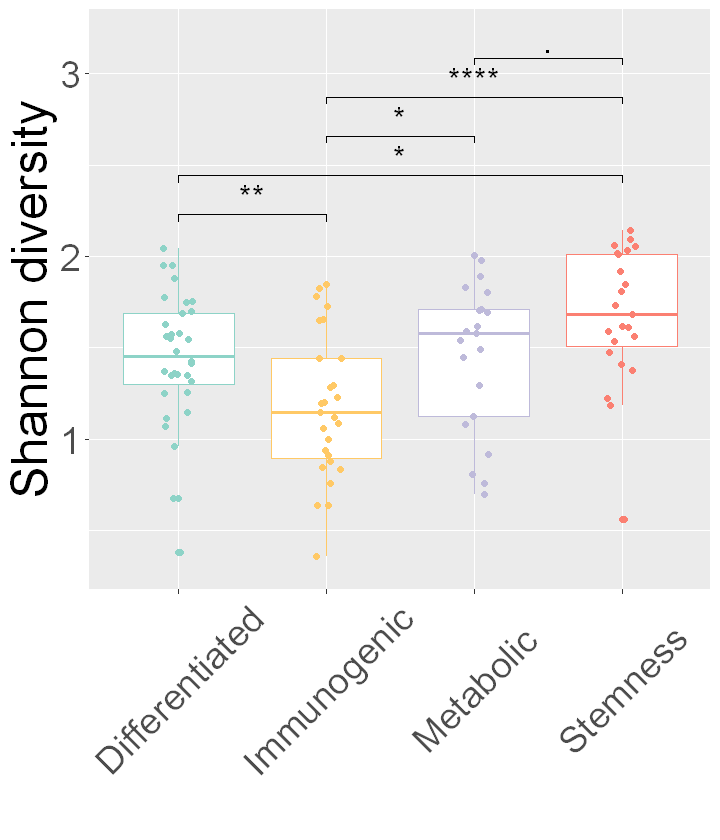

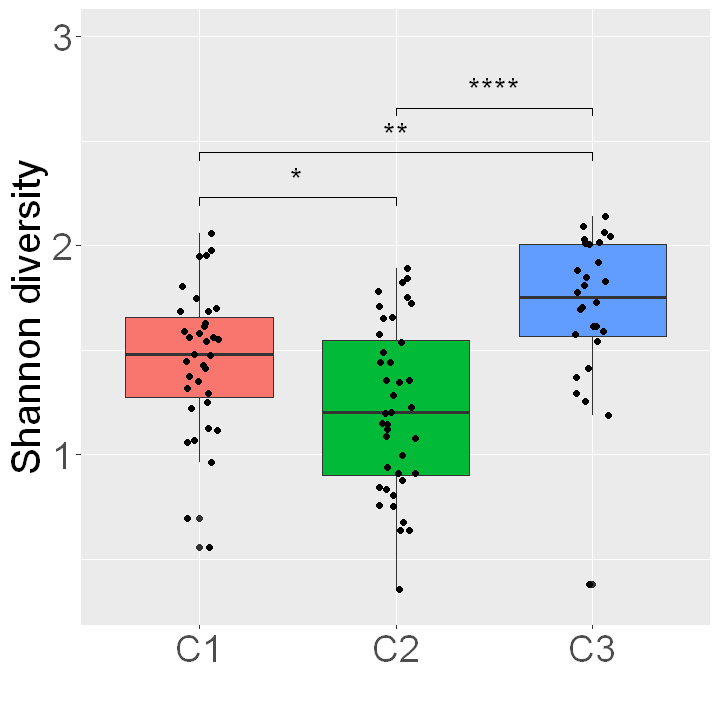

In [3]:
options(repr.plot.width=6,repr.plot.height=7)
p=ggplot(data=data1,aes(x=NMF,y=shannon,color=NMF))+
geom_boxplot()+geom_jitter(width=0.1)+ylim(min(data1$shannon)*0.9,max(data1$shannon)*1.5)+
scale_color_manual(values=c("#8DD3C7", "#FFC966", "#BEBADA","#FB8072"),
                   labels=c("Differentiated", "Immunogenic", "Metabolic","Stemness"))+
scale_x_discrete(labels=c("Differentiated", "Immunogenic", "Metabolic","Stemness"))+ 
labs(x="",y="Shannon diversity")#,title="shannon diversity")

p=p+stat_compare_means(label="p.signif",comparisons=list(c(1,2),c(1,4),c(2,3),c(2,4),c(3,4)),size=7,tip.length=0.02,
    symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 0.1,1), symbols = c("****", "***", "**", "*",".", "ns")))
p=p+theme(legend.position="none",axis.title=element_text(size=30),
          axis.text=element_text(size=22),
          axis.text.x=element_text(angle=45,vjust =0.5))

p


options(repr.plot.height=6,repr.plot.width=6)
p1=ggplot(data=data1,aes(x=danaher_Cluster,y=shannon,fill=danaher_Cluster))+
geom_boxplot()+geom_jitter(width=0.1)+ylim(min(data1$shannon)*0.9,max(data1$shannon)*1.4)+
labs(x="",y="Shannon diversity")#,title="shannon diversity")

p1=p1+
    stat_compare_means(label="p.signif",size=7,tip.length = 0.02,comparisons = list(c(1,2),c(1,3),c(2,3)))+
    theme(legend.position="none",,axis.title=element_text(size=24),
          axis.text=element_text(size=22),
         )
p1


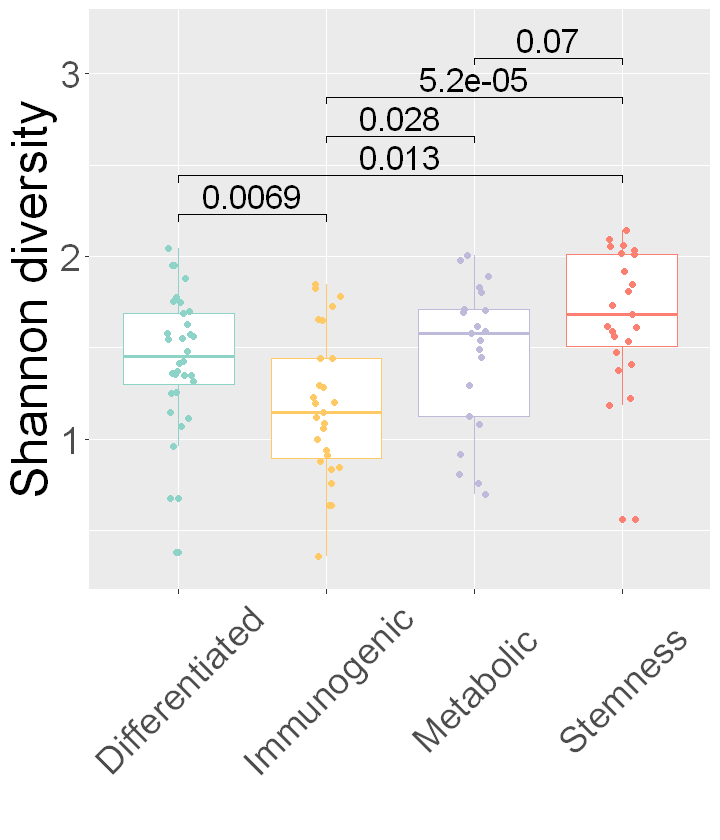

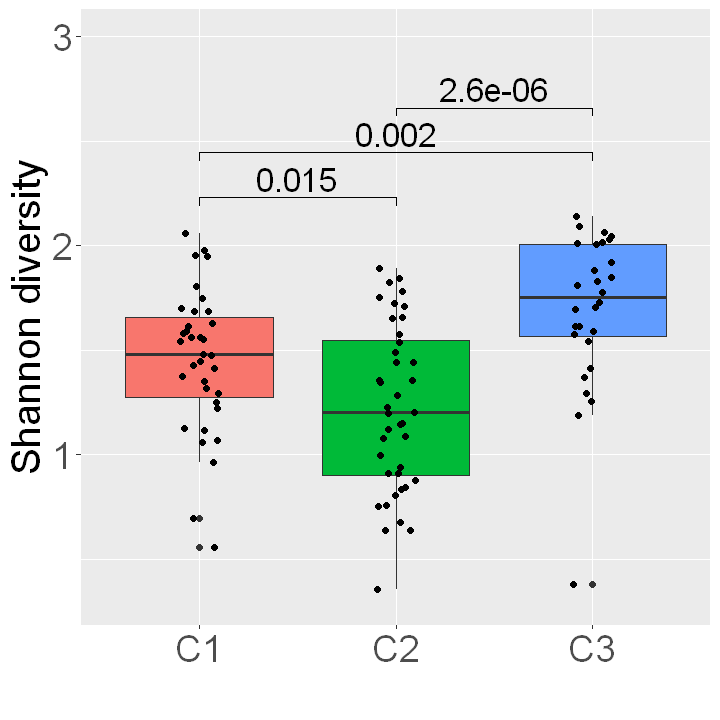

In [4]:
### also draw the pvalue instead of the signif
options(repr.plot.width=6,repr.plot.height=7)
p=ggplot(data=data1,aes(x=NMF,y=shannon,color=NMF))+
geom_boxplot()+geom_jitter(width=0.1)+ylim(min(data1$shannon)*0.9,max(data1$shannon)*1.5)+
scale_color_manual(values=c("#8DD3C7", "#FFC966", "#BEBADA","#FB8072"),
                   labels=c("Differentiated", "Immunogenic", "Metabolic","Stemness"))+
scale_x_discrete(labels=c("Differentiated", "Immunogenic", "Metabolic","Stemness"))+ 
labs(x="",y="Shannon diversity")#,title="shannon diversity")

p=p+stat_compare_means(comparisons=list(c(1,2),c(1,4),c(2,3),c(2,4),c(3,4)),size=7,tip.length=0.02)
p=p+theme(legend.position="none",axis.title=element_text(size=30),
          axis.text=element_text(size=22),
          axis.text.x=element_text(angle=45,vjust =0.5))

p


options(repr.plot.height=6,repr.plot.width=6)
p1=ggplot(data=data1,aes(x=danaher_Cluster,y=shannon,fill=danaher_Cluster))+
geom_boxplot()+geom_jitter(width=0.1)+ylim(min(data1$shannon)*0.9,max(data1$shannon)*1.4)+
labs(x="",y="Shannon diversity")#,title="shannon diversity")

p1=p1+
    stat_compare_means(size=7,tip.length = 0.02,comparisons = list(c(1,2),c(1,3),c(2,3)))+
    theme(legend.position="none",,axis.title=element_text(size=24),
          axis.text=element_text(size=22),
         )
p1

## Fig4D

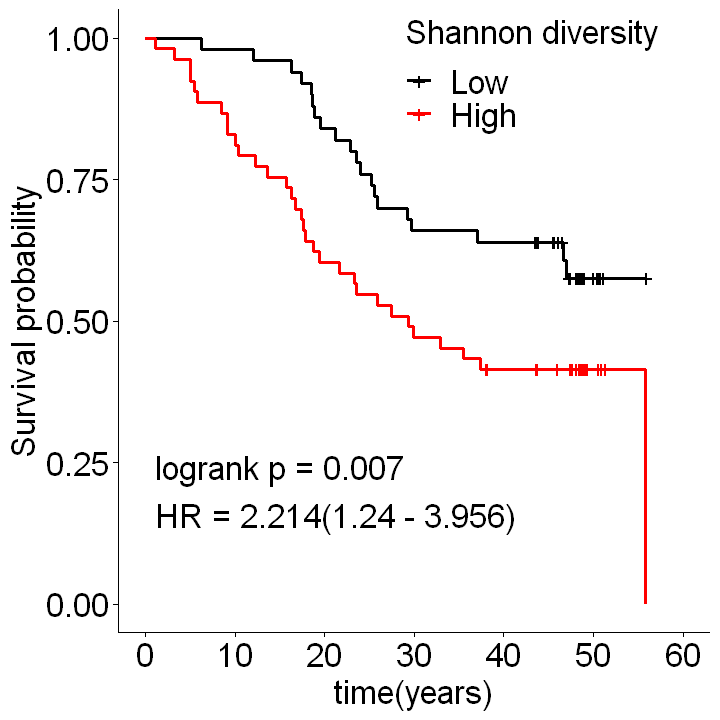

In [5]:

hazard.ratio=function(x,time,event){
    newdata=data.frame(time=time,event=event,x=x)
    newdata=cbind(newdata,data1[,c("sex","age","smoke","drink","history","T_stage","G_stage")])#this the new line added 20190904, 
    result=summary(coxph(Surv(time,event)~x+sex+age+smoke+drink+T_stage+G_stage,data=newdata))
    result=data.frame(cbind(result$conf.int,result$coefficients[,5]))
    colnames(result)=c("hazard.ratio","exp(-coef)","lower","upper","pvalue")
    hz=result[1,]
    pval=paste0("logrank p = ",round(hz[1,5],3),"\nHR = ",round(hz[1,1],3),
               "(",round(hz[1,3],3)," - ",round(hz[1,4],3),")")
    pval
    }



surv_cut=surv_cutpoint(data = data1,time="time",event="status",variables = "shannon")
surv_cat=surv_categorize(surv_cut,variables = "shannon",labels=c(0,1))
pval=hazard.ratio(surv_cat$shannon,surv_cat$time,surv_cat$status)
fit=surv_fit(Surv(time,status)~shannon,data=surv_cat)


ggsurvplot(fit,data=surv_cat,pval = pval,palette = c("black","red"),legend=c(0.7,0.9),font.legend=c(20),xlab="time(years)",pval.size=7,
           risk.table=FALSE,font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),
           legend.title="Shannon diversity",legend.labs=c("Low","High"))



In [6]:
surv_cut=surv_cutpoint(data = neo_surv,time="time",event="status",variables = colnames(neo_surv)[13:ncol(neo_surv)],minprop = 0.15)
surv_cat=surv_categorize(surv_cut,variables = colnames(neo_surv)[13:ncol(neo_surv)],labels=c(0,1))

  |======================================================================| 100%

In [7]:
hazard.ratio=function(x,time,event){
    newdata=data.frame(time=time,event=event,x=x)
    newdata=cbind(newdata,neo_surv[,c("sex","age","smoke","drink","history","T_stage","G_stage")])#this the new line added 20190904, 
    result=summary(coxph(Surv(time,event)~x+sex+age+smoke+drink+T_stage+G_stage,data=newdata))
    result=data.frame(cbind(result$conf.int,result$coefficients[,5]))
    colnames(result)=c("hazard.ratio","exp(-coef)","lower","upper","pvalue")
    hz=result[1,]
    c(round(hz[1,5],3),round(hz[1,1],3),round(hz[1,3],3),round(hz[1,4],3))
    }

hzs=NULL
for (x in colnames(neo_surv)[13:ncol(neo_surv)]){
hzs=rbind(hzs,hazard.ratio(surv_cat[,x],surv_cat$time,surv_cat$status))}

In [8]:
hzs=as.data.frame(hzs)

In [9]:
rownames(hzs)=colnames(neo_surv)[13:ncol(neo_surv)]
colnames(hzs)=c("pvalue","hz","lower","upper")

In [10]:
hzs=hzs[order(hzs$hz),]

In [11]:
hzs$neos=rownames(hzs)

In [12]:
hzs$neos=gsub("[._]"," ",hzs$neos)

In [13]:
 sigvalue=function(x){
     if (x <=0.001) {y="***"}
     else if (x<=0.01 & x >0.001) {y="**"}
     else if (x <=0.05 & x>0.01) {y="*"}
     else if (x<=0.1 & x>0.05) {y="·"}
     else {y=""}
     y
 }

In [14]:
hzs$signif=lapply(hzs$pvalue,sigvalue)

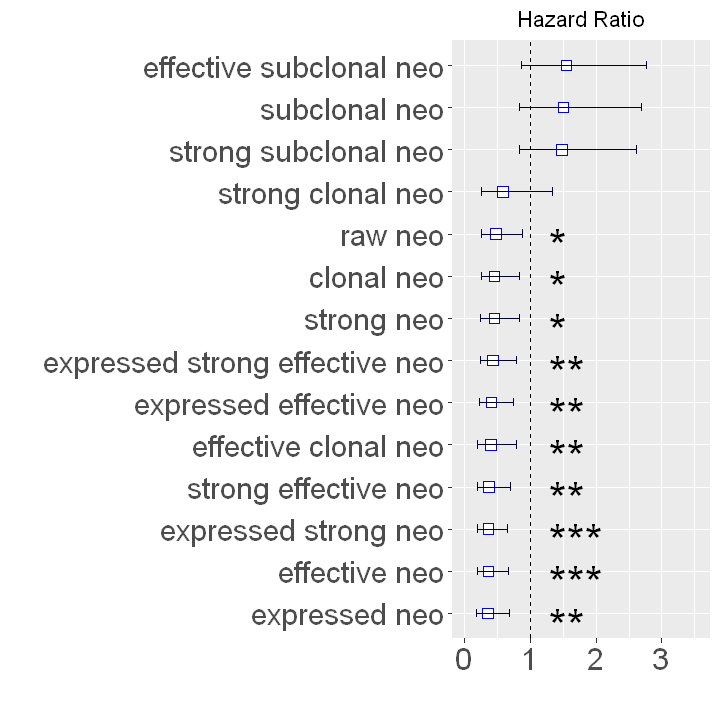

In [15]:
options(repr.plot.width=6,repr.plot.height=6)
p1=ggplot(data=hzs,aes(x=hz,y=neos))+
geom_point(size=3, color="blue", fill="white", shape=22)+
geom_errorbarh(aes(xmin=lower,xmax=upper),height=0.2,cex=0.5,colour="#000033")+
geom_vline(xintercept = 1,linetype=2)+
geom_text(data=subset(hzs,pvalue<=0.05),aes(x=max(upper+0.25,1.3),y=neos,label=signif),hjust=0,vjust=1, nudge_y = 0.15,size=10)+
#geom_text(data=subset(hzs,pvalue<=0.10 & pvalue>0.05),aes(x=max(upper+0.25,1.3),y=neos,label=signif),hjust=0,vjust=0.5, nudge_y = 0,size=18)+
#geom_text(data=subset(hz,pvalue<=0.1 & pvalue>0.05),aes(x=upper+0.3,y=cell,label=signif),hjust=0))+
xlim(0,max(hzs$upper)+0.8)+
labs(x="",title="Hazard Ratio")+
scale_y_discrete(name="",limits=as.character(hzs$neo))+
theme(plot.title = element_text(hjust = 0.5),
    axis.text=element_text(size=18),
    axis.title=element_text(size=18)
)
p1

In [16]:
fit=surv_fit(Surv(time,status)~raw_neo,data=surv_cat)
pval=paste0("logrank p = ",hzs["raw_neo",1],"\nHR = ",hzs["raw_neo",2],
               "(",hzs["raw_neo",3]," - ",hzs["raw_neo",4],")")
options(repr.plot.height=7,repr.plot.width=7)
p2=ggsurvplot(fit,data=surv_cat,pval = pval,palette = c("black","red"),legend=c(0.75,0.9),font.legend=c(20),xlab="time(years)",pval.size=7,
           risk.table=FALSE,font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),
           legend.title="raw neo",legend.labs=c("Low","High"))

fit=surv_fit(Surv(time,status)~effective_neo,data=surv_cat)

pval=paste0("logrank p = ",hzs["effective_neo",1],"\nHR = ",hzs["effective_neo",2],
               "(",hzs["effective_neo",3]," - ",hzs["effective_neo",4],")")

p3=ggsurvplot(fit,data=surv_cat,pval = pval,palette = c("black","red"),legend=c(0.75,0.9),font.legend=c(20),xlab="time(years)",pval.size=7,
           risk.table=FALSE,font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),
           legend.title="effective neo",legend.labs=c("Low","High"))

                               
fit=surv_fit(Surv(time,status)~expressed_effective_neo,data=surv_cat)
pval=paste0("logrank p = ",hzs["expressed_effective_neo",1],"\nHR = ",hzs["expressed_effective_neo",2],
               "(",hzs["expressed_effective_neo",3]," - ",hzs["expressed_effective_neo",4],")")

p4=ggsurvplot(fit,data=surv_cat,pval = pval,palette = c("black","red"),legend=c(0.7,0.9),font.legend=c(18),xlab="time(years)",pval.size=7,
           risk.table=FALSE,font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),
           legend.title="expressed effective neo",legend.labs=c("Low","High"))

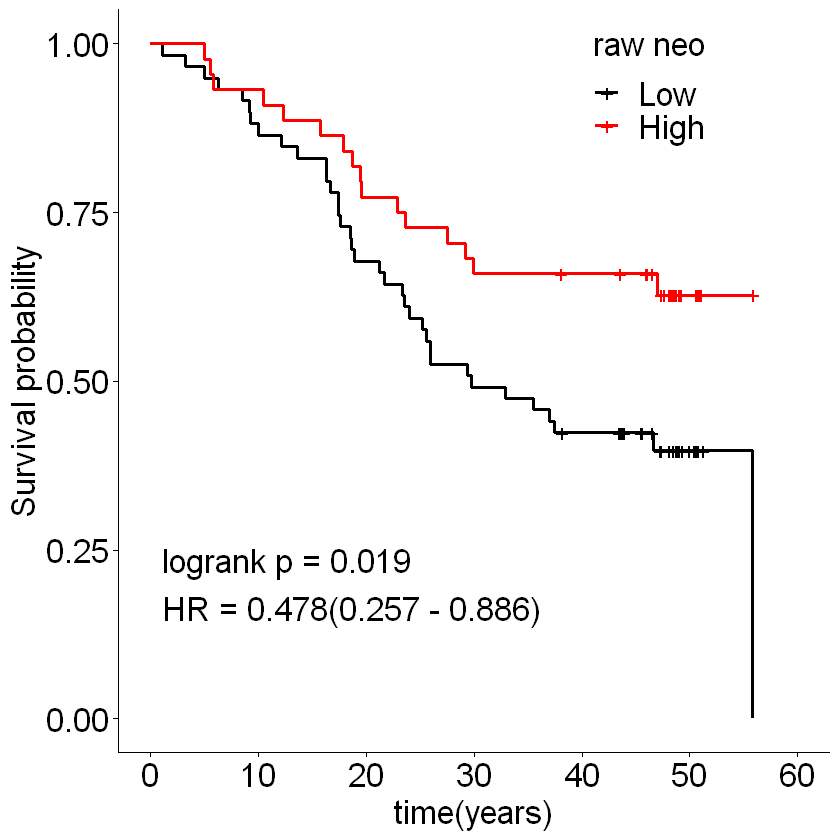

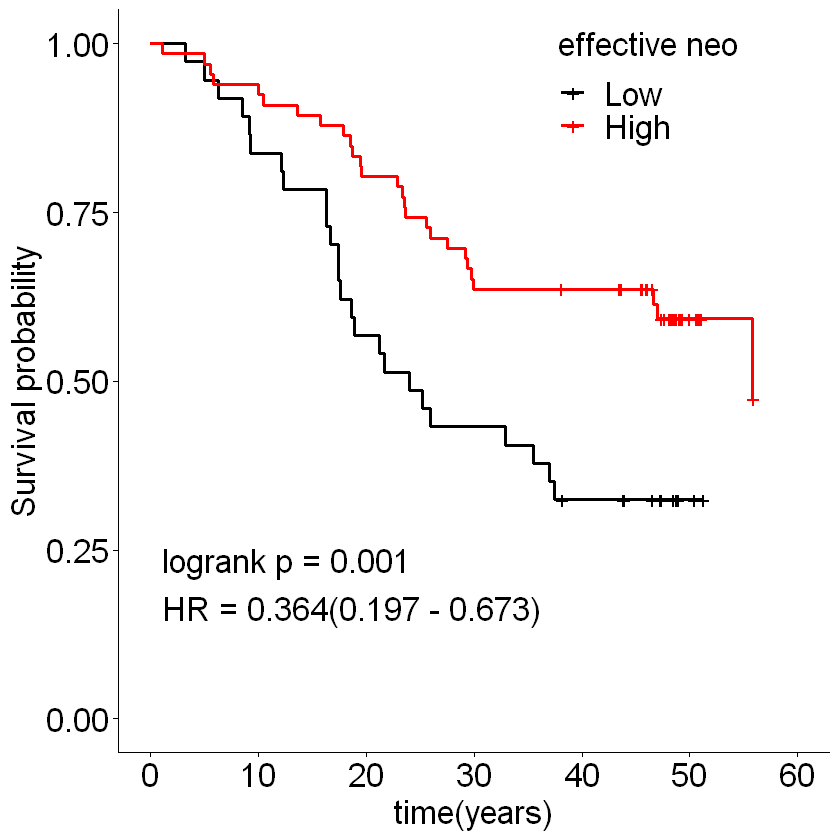

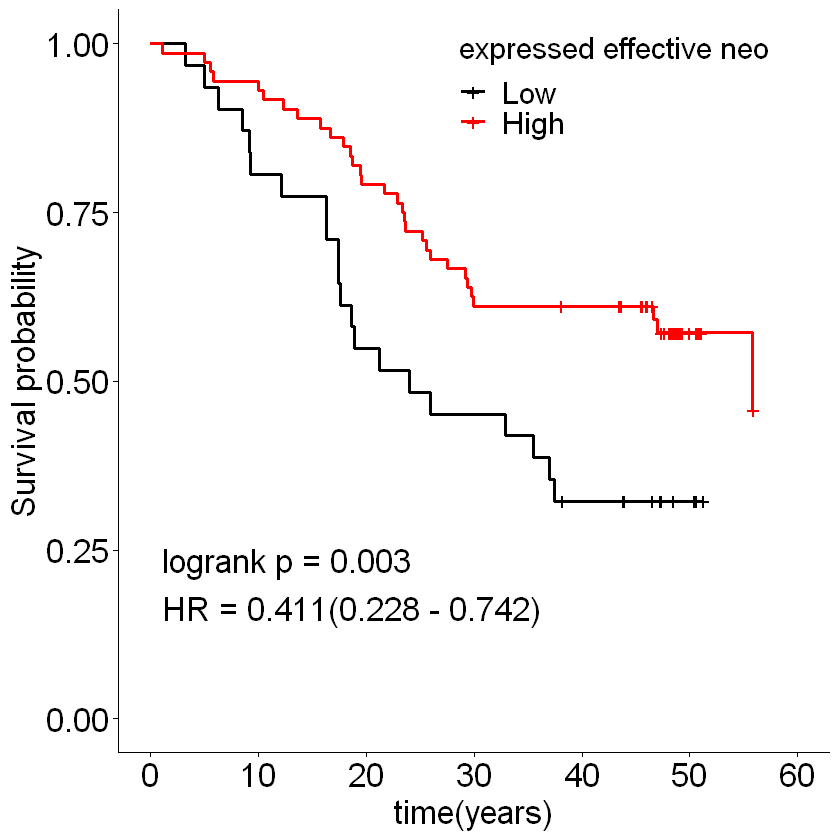

In [17]:
p2
p3
p4

In [18]:
hzs#hazard ratio table

,pvalue,hz,lower,upper,neos,signif
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<list>
expressed_neo,0.002,0.362,0.189,0.693,expressed neo,**
effective_neo,0.001,0.364,0.197,0.673,effective neo,***
expressed_strong_neo,0.001,0.364,0.202,0.656,expressed strong neo,***
strong_effective_neo,0.003,0.372,0.196,0.706,strong effective neo,**
effective_clonal_neo,0.009,0.405,0.205,0.799,effective clonal neo,**
expressed_effective_neo,0.003,0.411,0.228,0.742,expressed effective neo,**
expressed_strong_effective_neo,0.006,0.436,0.241,0.788,expressed strong effective neo,**
strong_neo,0.011,0.460,0.253,0.838,strong neo,*
clonal_neo,0.011,0.461,0.254,0.837,clonal neo,*
